<a href="https://colab.research.google.com/github/lwallac2/Bank-Marketing/blob/main/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import spatial
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

from IPython.display import HTML # This is just for me so I can embed videos
from IPython.display import Image # This is just for me so I can embed images

#Reading in the data as bank dataframe
df = pd.read_csv("https://raw.githubusercontent.com/lwallac2/Bank-Marketing/main/bank-additional.csv", sep=';')

#Verifying that we can see the data
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [ ]:
df1 = df
df1.day_of_week.replace('mon',1, inplace=True)
df1.day_of_week.replace('tue',2, inplace=True)
df1.day_of_week.replace('wed',3, inplace=True)
df1.day_of_week.replace('thu',4, inplace=True)
df1.day_of_week.replace('fri',5, inplace=True)

df1.job.replace('admin.',1, inplace=True)
df1.job.replace('blue-collar',2, inplace=True)
df1.job.replace('entrepreneur',3, inplace=True)
df1.job.replace('housemaid',4, inplace=True)
df1.job.replace('management',5, inplace=True)
df1.job.replace('retired',6, inplace=True)
df1.job.replace('self-employed',7, inplace=True)
df1.job.replace('services',8, inplace=True)
df1.job.replace('student',9, inplace=True)
df1.job.replace('technician',10, inplace=True)
df1.job.replace('unemployed',11, inplace=True)
df1.job.replace('unknown',12, inplace=True)

df1.marital.replace('divorced',1, inplace=True)
df1.marital.replace('married',2, inplace=True)
df1.marital.replace('single',3, inplace=True)
df1.marital.replace('unknown',4, inplace=True)


df1.education.replace('basic.4y',1, inplace=True)
df1.education.replace('basic.6y',2, inplace=True)
df1.education.replace('basic.9y',3, inplace=True)
df1.education.replace('high.school',4, inplace=True)
df1.education.replace('illiterate',5, inplace=True)
df1.education.replace('professional.course',6, inplace=True)
df1.education.replace('university.degree',7, inplace=True)
df1.education.replace('unknown',8, inplace=True)

df1.default.replace('no',0, inplace=True)
df1.default.replace('yes',1, inplace=True)
df1.default.replace('unknown',2, inplace=True)

df1.housing.replace('no',0, inplace=True)
df1.housing.replace('yes',1, inplace=True)
df1.housing.replace('unknown',2, inplace=True)

df1.loan.replace('no',0, inplace=True)
df1.loan.replace('yes',1, inplace=True)
df1.loan.replace('unknown',2, inplace=True)

df1.contact.replace('cellular',0, inplace=True)
df1.contact.replace('telephone',1, inplace=True)

df1.month.replace('jan',1, inplace=True)
df1.month.replace('feb',2, inplace=True)
df1.month.replace('mar',3, inplace=True)
df1.month.replace('apr',4, inplace=True)
df1.month.replace('may',5, inplace=True)
df1.month.replace('jun',6, inplace=True)
df1.month.replace('jul',7, inplace=True)
df1.month.replace('aug',8, inplace=True)
df1.month.replace('sep',9, inplace=True)
df1.month.replace('oct',10, inplace=True)
df1.month.replace('nov',11, inplace=True)
df1.month.replace('dec',12, inplace=True)


df1.poutcome.replace('failure',1, inplace=True)
df1.poutcome.replace('nonexistent',2, inplace=True)
df1.poutcome.replace('success',3, inplace=True)

df1.y.replace('no',0, inplace=True)
df1.y.replace('yes',1, inplace=True)

df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,2,2,3,0,1,0,0,5,5,487,2,999,0,2,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,8,3,4,0,0,0,1,5,5,346,4,999,0,2,1.1,93.994,-36.4,4.855,5191.0,0
2,25,8,2,4,0,1,0,1,6,3,227,1,999,0,2,1.4,94.465,-41.8,4.962,5228.1,0
3,38,8,2,3,0,2,2,1,6,5,17,3,999,0,2,1.4,94.465,-41.8,4.959,5228.1,0
4,47,1,2,7,0,1,0,0,11,1,58,1,999,0,2,-0.1,93.200,-42.0,4.191,5195.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,1,2,2,0,1,1,0,7,4,53,1,999,0,2,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,1,2,4,0,1,0,1,7,5,219,1,999,0,2,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,9,3,4,0,0,0,0,5,1,64,2,999,1,1,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,1,2,4,0,0,0,0,8,5,528,1,999,0,2,1.4,93.444,-36.1,4.966,5228.1,0


## Question 1

In [ ]:
from sklearn.model_selection import train_test_split
x=df.iloc[:,:8] # all parameters
y=df['education'] 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)                            
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))

X_train shape: (3295, 8)
X_test shape: (824, 8)


In [ ]:
rf = RandomForestClassifier()
rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier()>

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
# First, the accuracy score
accuracy_score(y_test, y_pred)

0.9927184466019418

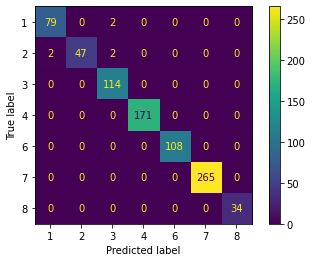

In [ ]:
# Next, the Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test, y_test)

In [ ]:
# Finally, the Classification Report
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

print(metrics.classification_report(y_test, y_pred, labels=[1, 2, 3, 4, 5, 6, 7, 8]))

              precision    recall  f1-score   support

           1       0.98      0.98      0.98        81
           2       1.00      0.92      0.96        51
           3       0.97      1.00      0.98       114
           4       1.00      1.00      1.00       171
           5       0.00      0.00      0.00         0
           6       1.00      1.00      1.00       108
           7       1.00      1.00      1.00       265
           8       1.00      1.00      1.00        34

   micro avg       0.99      0.99      0.99       824
   macro avg       0.87      0.86      0.86       824
weighted avg       0.99      0.99      0.99       824



## Question 2

In [ ]:
# We are setting up the n_estimators and other configuration parameters so that we can easily change them
# Feel free to comment any of these out or change the values and re-run the cells below to see how this changes the result
n_estimators = 1000 # This is the number of different trees to build; default was 100; we are increasing this number tenfold.
min_samples_split = 5 # Previously, we ran this with the default split of 2
criterion='entropy' # This is for Information Gain; previously, we ran this with the Gini Index

In [ ]:
rf2 = RandomForestClassifier(verbose=1, n_estimators=n_estimators, min_samples_split=min_samples_split, criterion=criterion)
rf2.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.3s finished


RandomForestClassifier(criterion='entropy', min_samples_split=5,
                       n_estimators=1000, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.9963592233009708


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.4s finished


              precision    recall  f1-score   support

           1       0.99      0.99      0.99        81
           2       1.00      0.96      0.98        51
           3       0.98      1.00      0.99       114
           4       1.00      1.00      1.00       171
           5       0.00      0.00      0.00         0
           6       1.00      1.00      1.00       108
           7       1.00      1.00      1.00       265
           8       1.00      1.00      1.00        34

   micro avg       1.00      1.00      1.00       824
   macro avg       0.87      0.87      0.87       824
weighted avg       1.00      1.00      1.00       824



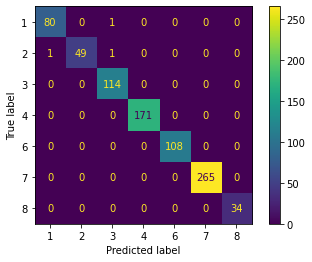

In [ ]:
# Testing and predicting
y_pred = rf2.predict(X_test)

print(accuracy_score(y_test, y_pred))
plot_confusion_matrix(rf2, X_test, y_test)
print(metrics.classification_report(y_test, y_pred, labels=[1, 2, 3, 4, 5, 6, 7, 8]))

So essentially the models are extremely accurate and I don't see a large benefit to use 1000 trees versuses the 100 trees. The models show the accuracy down the diagonal with almost 0's everywhere else. That shows the success that the random forest has with predicting the categories. I chose the education variable which has 8 variables, which I recoded up above. Overall, the random forest worked very well with my dataset so the difference was not substantial, which is why I would pick the easier model if the other more complex model doesn't add very much. 